#Reading the data


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Income>=50k/census.csv')
data

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


# Data Exploration


In [ ]:
data['education-num'].describe()

count    45222.000000
mean        10.118460
std          2.552881
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education-num, dtype: float64

In [ ]:
print("The shape of the data is: {}".format(data.income.shape))
a = data.income.value_counts()
print("The number of people who earn more less than 50K are: {}".format(a[0]))
print("The number of people who earn more more than 50K are: {}".format(a[1]))
print("The percentage of people earn more than 50k are {}".format((a[1]*100)/(a[0]+a[1])))

The shape of the data is: (45222,)
The number of people who earn more less than 50K are: 34014
The number of people who earn more more than 50K are: 11208
The percentage of people earn more than 50k are 24.78439697492371


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [ ]:
#checking if there is any missing data

data.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#Exploratory Data Analysis

In [ ]:
data['age'].describe()

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [ ]:
data['capital-gain'].describe()

count    45222.000000
mean      1101.430344
std       7506.430084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [ ]:
data['capital-loss'].describe()

count    45222.000000
mean        88.595418
std        404.956092
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [ ]:
data['hours-per-week'].describe()

count    45222.000000
mean        40.938017
std         12.007508
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

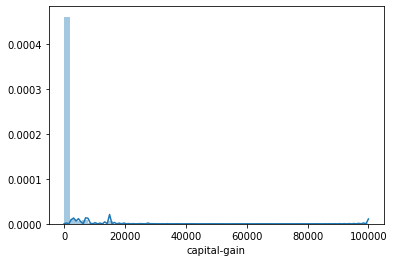

In [ ]:
#distributions of the variable capital gain and capital loss
import seaborn as sns
x = data['capital-gain']
sns.distplot(x)




In [ ]:
#binning the hours per week data
bins = [0, 2500,5000,7500,10000,20000,30000,40000,50000]
labels =[1,2,3,4,5,6,7,8]
data['binned'] = pd.cut(data['hours-per-week'], bins,labels=labels)


In [ ]:
#transforming the variable.log transformation

skewed = ['capital-gain', 'capital-loss']
data[skewed] = data[skewed].apply(
    lambda x: np.log(x + 1))

(array([7308., 8226., 8704., 8811., 5716., 3609., 2000.,  579.,  192.,
          77.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

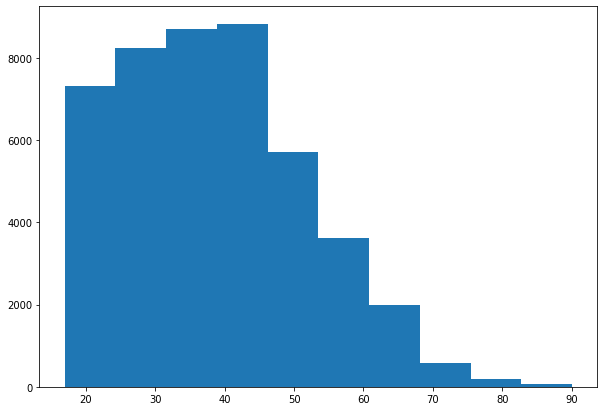

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(data['age'])

(array([  294.,   449.,  1499.,  1223.,  2196., 14783., 11858.,  1507.,
        10084.,  1329.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

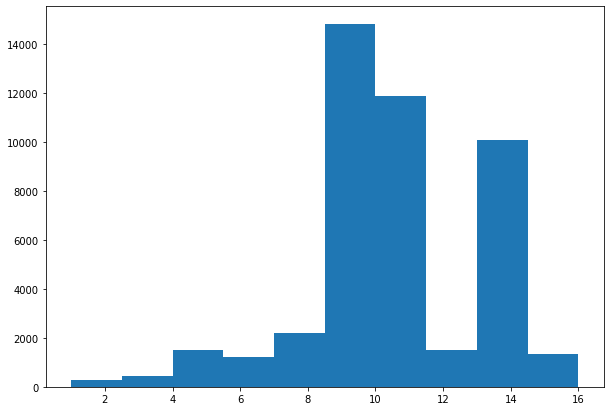

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(data['education-num'])

(array([4.1432e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00,
        5.8000e+01, 7.4500e+02, 1.8930e+03, 8.5000e+02, 2.3600e+02]),
 array([ 0.        ,  1.15129255,  2.30258509,  3.45387764,  4.60517019,
         5.75646273,  6.90775528,  8.05904783,  9.21034037, 10.36163292,
        11.51292546]),
 <a list of 10 Patch objects>)

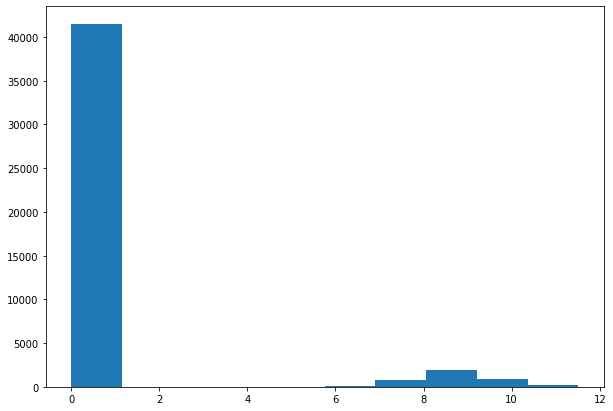

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(data['capital-gain'])

(array([  777.,  2825.,  2933., 24910.,  4482.,  5621.,  2541.,   648.,
          287.,   198.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

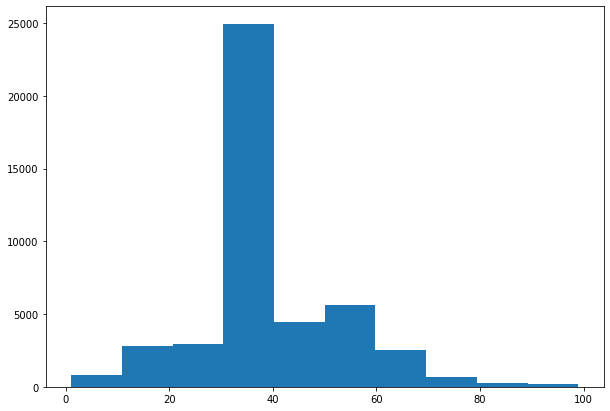

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(data['hours-per-week'])

In [ ]:
#applying scaling

scaler = MinMaxScaler()  
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data=data)
features_log_minmax_transform[numerical] = scaler.fit_transform(
    data[numerical])

In [ ]:
data

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.219178,Private,Bachelors,0.800000,Never-married,Prof-specialty,Own-child,White,Male,0.000000,0.0,0.397959,United-States,<=50K
45218,0.301370,Private,Bachelors,0.800000,Divorced,Prof-specialty,Not-in-family,White,Female,0.000000,0.0,0.357143,United-States,<=50K
45219,0.287671,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
45220,0.369863,Private,Bachelors,0.800000,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.747375,0.0,0.397959,United-States,<=50K


In [ ]:
data['workclass'].value_counts()

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for v in ['workclass', 'education_level','marital-status', 'occupation', 'relationship', 'race', 'sex','native-country','income']:
  data.loc[:,v] = le.fit_transform(data.loc[:,v])
  



In [ ]:
le = LabelEncoder()
a = data['department']
le.fit(a)
integer_mapping = {l: i for i, l in enumerate(le.classes_)}
integer_mapping

{'IT': 0,
 'RandD': 1,
 'accounting': 2,
 'hr': 3,
 'management': 4,
 'marketing': 5,
 'product_mng': 6,
 'sales': 7,
 'support': 8,
 'technical': 9}

In [ ]:
df.drop(labels=['workclass', 'education_level','marital-status', 'occupation', 'relationship', 'race', 'sex'],axis=1,inplace=True)
df

,age,education-num,capital-gain,capital-loss,hours-per-week,income,binned,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_nan
0,0.301370,0.800000,0.667492,0.0,0.397959,<=50K,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,<=50K,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,<=50K,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,<=50K,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,<=50K,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.219178,0.800000,0.000000,0.0,0.397959,<=50K,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
45218,0.301370,0.800000,0.000000,0.0,0.357143,<=50K,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
45219,0.287671,0.800000,0.000000,0.0,0.500000,<=50K,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
45220,0.369863,0.800000,0.747375,0.0,0.397959,<=50K,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df = data

In [ ]:
#separating the target variable
y = df['income']

In [ ]:
#removing the target variable from the dataframe
df.drop(['income'],axis=1,inplace=True)

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 0)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))



Training set has 36177 samples.
Testing set has 9045 samples.


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X_train, y_train,cat_features=['binned'])

Learning rate set to 0.047685
0:	learn: 0.6474602	total: 21.2ms	remaining: 21.1s
1:	learn: 0.6066322	total: 42.3ms	remaining: 21.1s
2:	learn: 0.5718013	total: 60.9ms	remaining: 20.3s
3:	learn: 0.5424842	total: 78.9ms	remaining: 19.6s
4:	learn: 0.5152860	total: 96.4ms	remaining: 19.2s
5:	learn: 0.4938405	total: 114ms	remaining: 18.9s
6:	learn: 0.4734938	total: 132ms	remaining: 18.8s
7:	learn: 0.4573746	total: 150ms	remaining: 18.6s
8:	learn: 0.4407763	total: 167ms	remaining: 18.4s
9:	learn: 0.4284791	total: 184ms	remaining: 18.2s
10:	learn: 0.4174116	total: 206ms	remaining: 18.5s
11:	learn: 0.4075188	total: 223ms	remaining: 18.3s
12:	learn: 0.3987421	total: 240ms	remaining: 18.2s
13:	learn: 0.3904086	total: 257ms	remaining: 18.1s
14:	learn: 0.3840447	total: 274ms	remaining: 18s
15:	learn: 0.3794171	total: 289ms	remaining: 17.8s
16:	learn: 0.3742585	total: 306ms	remaining: 17.7s
17:	learn: 0.3695827	total: 323ms	remaining: 17.6s
18:	learn: 0.3656856	total: 339ms	remaining: 17.5s
19:	lear

In [ ]:
# predict the results
y_pred=model.predict(X_test)

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Catboost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Catboost Model accuracy score: 0.8710


In [ ]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
# predict the results
y_pred=clf.predict(X_test)

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Catboost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Catboost Model accuracy score: 0.9867


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
gbc =  GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, max_features=2, max_depth=2, random_state=0)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# predict the results
y_pred=gbc.predict(X_test)

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Catboost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Catboost Model accuracy score: 0.7836


In [ ]:
# save the model to disk
import pickle
filename = 'clf.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
import os 
!ls 

'=50k'	 abc   catboost_info   clf.sav	 drive	 sample_data


In [ ]:
df

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,binned
0,0.301370,5,9,0.800000,4,0,1,4,1,0.667492,0.0,0.397959,38,1
1,0.452055,4,9,0.800000,2,3,0,4,1,0.000000,0.0,0.122449,38,1
2,0.287671,2,11,0.533333,0,5,1,4,1,0.000000,0.0,0.397959,38,1
3,0.493151,2,1,0.400000,2,5,0,2,1,0.000000,0.0,0.397959,38,1
4,0.150685,2,9,0.800000,2,9,5,2,0,0.000000,0.0,0.397959,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.219178,2,9,0.800000,4,9,3,4,1,0.000000,0.0,0.397959,38,1
45218,0.301370,2,9,0.800000,0,9,1,4,0,0.000000,0.0,0.357143,38,1
45219,0.287671,2,9,0.800000,2,9,0,4,1,0.000000,0.0,0.500000,38,1
45220,0.369863,2,9,0.800000,0,0,3,1,1,0.747375,0.0,0.397959,38,1


# Employee Data


In [ ]:
from pycaret.datasets import get_data
data = get_data('employee') 
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [ ]:
#separating the target variable
y = data['left']

In [ ]:
#removing the target variable from the dataframe
data.drop(['left'],axis=1,inplace=True)

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for v in ['department', 'salary']:
  data.loc[:,v] = le.fit_transform(data.loc[:,v])
  



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 0)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 11999 samples.
Testing set has 3000 samples.


In [ ]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
# predict the results
y_pred=clf.predict(X_test)

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Catboost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Catboost Model accuracy score: 0.9877


In [ ]:
import pickle

with open('/content/drive/My Drive/Colab Notebooks/Income>=50k/model.pkl', 'wb') as f:
  pickle.dump(clf,f)

In [ ]:
import lightgbm as lgb
print(lgb.__version__)

2.2.3
